In [1]:
%matplotlib notebook

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
import numpy as np
import os
import sklearn.linear_model
import sklearn.preprocessing
import sklearn.decomposition
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
import scipy
import seaborn as sns
import pandas as pd
from cycler import cycler

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams["axes.prop_cycle"] = cycler('color', sns.color_palette("muted")) # chooses a nicer default set of colors.
sns.set_context("poster")

<IPython.core.display.Javascript object>


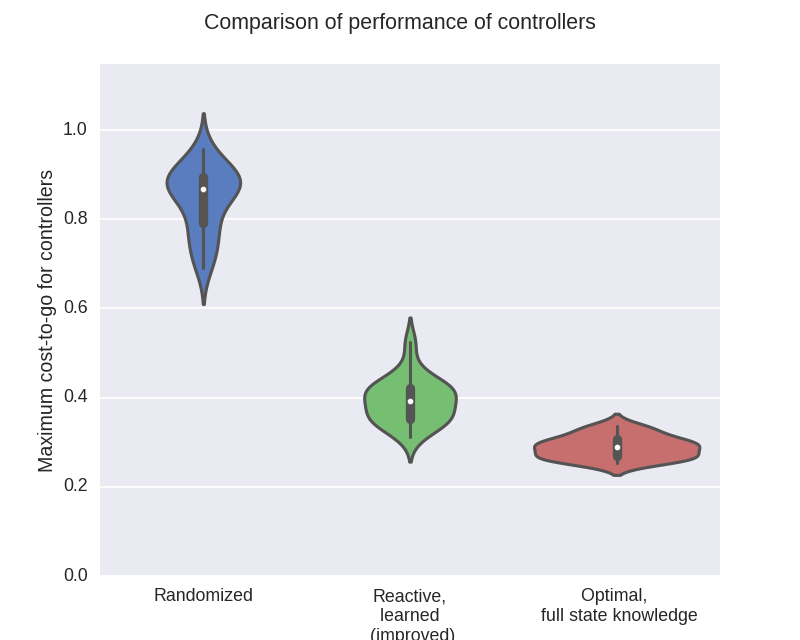

<IPython.core.display.Javascript object>


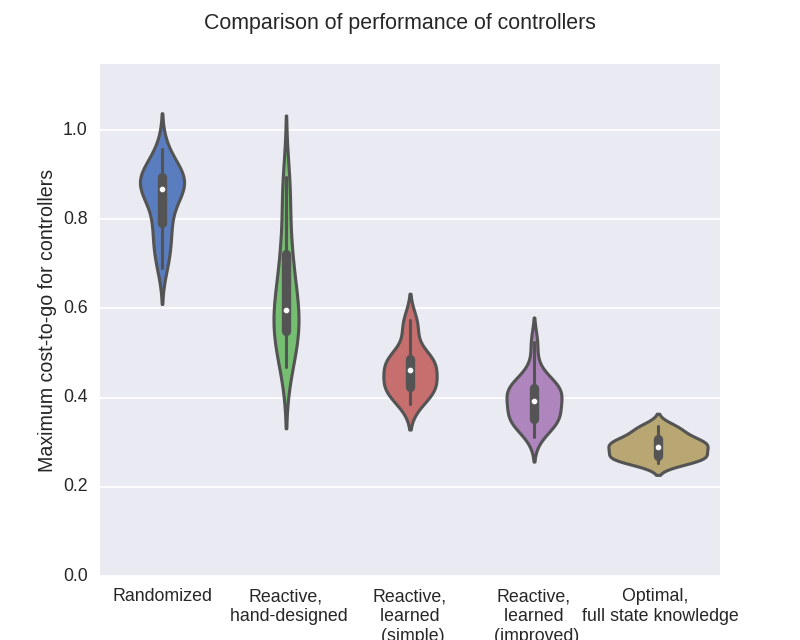

<IPython.core.display.Javascript object>


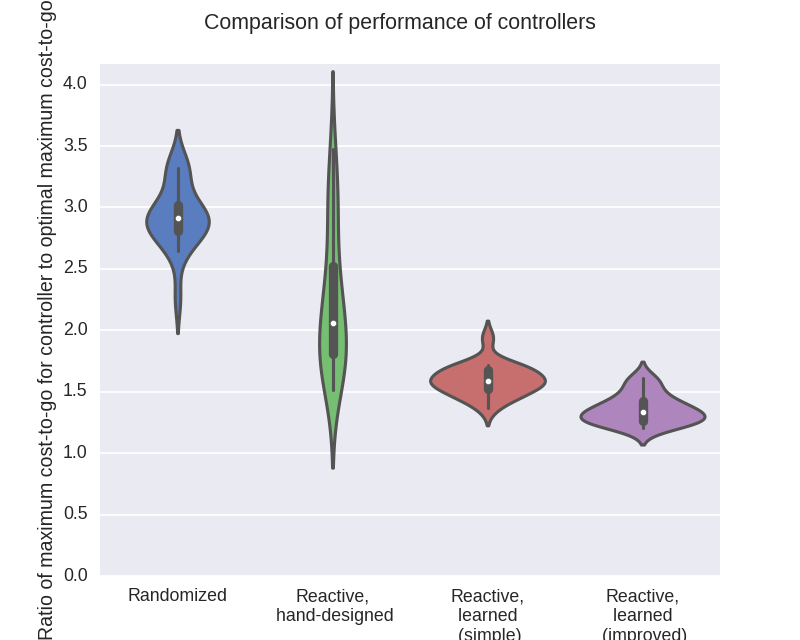

In [4]:
def normalize_by_optimal(d):
    return {k: np.divide(v, d[opt]) for (k, v) in dict.iteritems(d)}

'''
opt, best_ml, ... provide shorthand for the full name of these algorithms
'''

opt = 'Optimal, \n full state knowledge'
best_ml = 'Reactive,\n learned \n (improved)'
naive_ml = 'Reactive,\n learned \n (simple)'
hand_designed = 'Reactive,\n hand-designed'
randomized = 'Randomized'

# J_max and J_min data optianed from MATLAB

J_max = dict()
J_max[opt] = [0.30849, 0.33055, 0.29739, 0.27013, 0.28509, 0.32797, 0.29082, 0.29635, 0.28968, 0.27174, 0.25783, 0.25974, 0.25449, 0.33618, 0.27354, 0.30538, 0.26728, 0.31295, 0.26009, 0.29585, ]
J_max[best_ml] = [0.38918, 0.52431, 0.37626, 0.33761, 0.36627, 0.4121, 0.41105, 0.43362, 0.42124, 0.41577, 0.35259, 0.3119, 0.3405, 0.46662, 0.34855, 0.37407, 0.43151, 0.42422, 0.34608, 0.39384, ]
J_max[naive_ml] = [0.48525, 0.56434, 0.47486, 0.42704, 0.48771, 0.47742, 0.4522, 0.57487, 0.48552, 0.4158, 0.38666, 0.43664, 0.42592, 0.4906, 0.43679, 0.41704, 0.38977, 0.53715, 0.41171, 0.47002, ]
J_max[hand_designed] = [0.46821, 0.57251, 0.6398, 0.51179, 0.52219, 0.58051, 0.5726, 0.7182, 0.65291, 0.84841, 0.89547, 0.73193, 0.73582, 0.6111, 0.63856, 0.48259, 0.85066, 0.55229, 0.58293, 0.53825,  ]
J_max[randomized] = [0.86631, 0.87509, 0.86944, 0.90191, 0.79784, 0.93097, 0.8577, 0.88791, 0.89405, 0.90922, 0.72233, 0.76951, 0.8249, 0.95679, 0.73112, 0.69088, 0.88714, 0.89781, 0.77605, 0.85871, ]

J_max_norm = normalize_by_optimal(J_max)

J_mean = dict()
J_mean[opt] = [0.048015, 0.045439, 0.053838, 0.053029, 0.050003, 0.054249, 0.057654, 0.048237, 0.057099, 0.064338, 0.050653, 0.048447, 0.054243, 0.060876, 0.047659, 0.041983, 0.056871, 0.05655, 0.053815, 0.055249, ]
J_mean[best_ml] = [0.08245, 0.063708, 0.085025, 0.077708, 0.068393, 0.07671, 0.094097, 0.075124, 0.08123, 0.10635, 0.074664, 0.069793, 0.083935, 0.11073, 0.069267, 0.055399, 0.093638, 0.084665, 0.081371, 0.083421, ]
J_mean[naive_ml] = [0.10266, 0.096672, 0.12342, 0.11544, 0.11177, 0.11999, 0.12877, 0.10344, 0.12319, 0.13033, 0.11947, 0.1095, 0.10993, 0.12446, 0.11028, 0.086372, 0.1186, 0.13237, 0.11498, 0.11814, ]
J_mean[hand_designed] = [0.14219, 0.18054, 0.42077, 0.25486, 0.25654, 0.29392, 0.29536, 0.40678, 0.37611 ,0.6335, 0.68867, 0.52136, 0.52637, 0.28425, 0.36832, 0.20528, 0.63878, 0.26501, 0.33202, 0.25315, ]
J_mean[randomized] = [0.46067, 0.44715, 0.48969, 0.48641, 0.46268, 0.49984 ,0.53552, 0.46658 ,0.532 ,0.59298, 0.46891 ,0.43533, 0.50874, 0.58613, 0.43509, 0.35328, 0.52241 ,0.53825, 0.50742, 0.50572, ]

J_mean_norm = normalize_by_optimal(J_mean)

def plot_performance(d, controllers, ylabel = ''):
    df = pd.DataFrame(d)

    df_sub = df[controllers] # specifying the order in which we want the columns

    plt.rcParams['figure.figsize'] = (10, 8) # hardcoding for figure sizes
    
    fig, ax = plt.subplots()

    ax = sns.violinplot(data=df_sub)
    ax.set_xlabel('Controller used')
    ax.set_ylabel(ylabel)
    
    ymax = np.max(pd.DataFrame.max(df_sub))*1.2 # ugh, I really don't like this hardcoding here
    ax.set_ylim([0,ymax])

    fig.suptitle(
        "Comparison of performance of controllers",
    )
    
    plt.savefig('cache/'+','.join(controllers) + '.pdf', dpi=600, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0,
        frameon=None) # hardcoding to get export as nice pdf

    plt.show()

plot_performance(
    J_max, 
    controllers = [randomized, best_ml, opt, ], 
    ylabel = 'Maximum cost-to-go for controllers',
)
    
plot_performance(
    J_max, 
    controllers = [randomized, hand_designed, naive_ml, best_ml, opt, ], 
    ylabel = 'Maximum cost-to-go for controllers',
)
plot_performance(
    J_max_norm, 
    controllers = [randomized, hand_designed, naive_ml, best_ml, ], 
    ylabel = 'Ratio of maximum cost-to-go for controller to optimal maximum cost-to-go',
)
# plot_performance(J_mean_norm)